   order_id  customer_id order_date customer_name region  gender  age  \
0         1           91  5/10/2023   customer_91   east    male   26   
1         1           91  5/10/2023   customer_91   east    male   26   
2         1           91  5/10/2023   customer_91   east    male   26   
3         2           55   5/8/2023   customer_55  north    male   55   
4         3           72  2/24/2023   customer_72  south  female   34   

   product_id  quantity product_name category  price  total  year  month  day  
0           6         3    product_6      tea  13.85  41.55  2023      5   10  
1          14         2   product_14   pastry   4.52   9.04  2023      5   10  
2          11         4   product_11    snack   6.67  26.68  2023      5   10  
3           8         4    product_8   coffee  10.43  41.72  2023      5    8  
4           5         1    product_5      tea   5.64   5.64  2023      2   24  


C:\Users\user\AppData\Local\Temp\ipykernel_3492\2435355173.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")


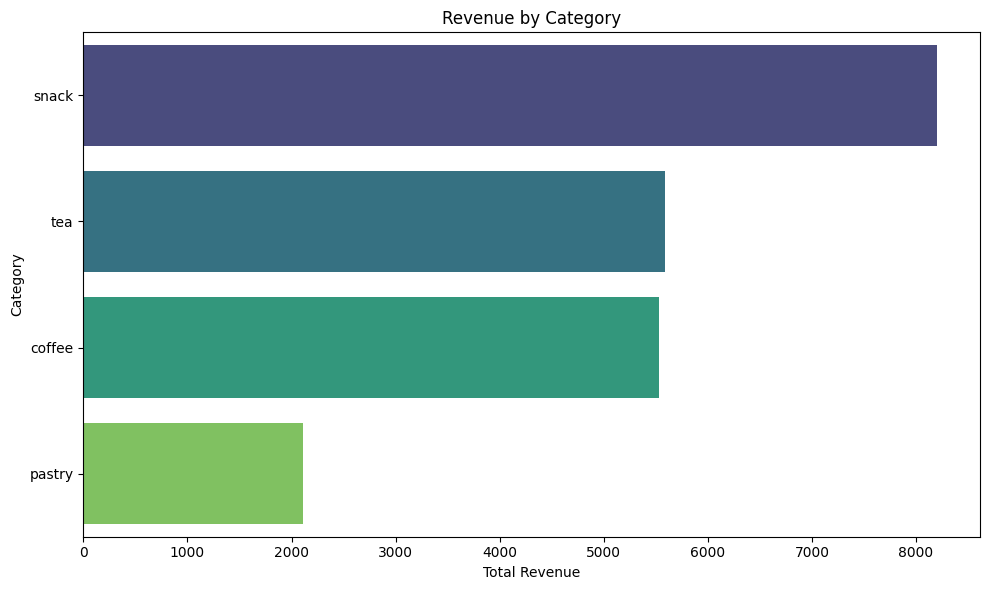

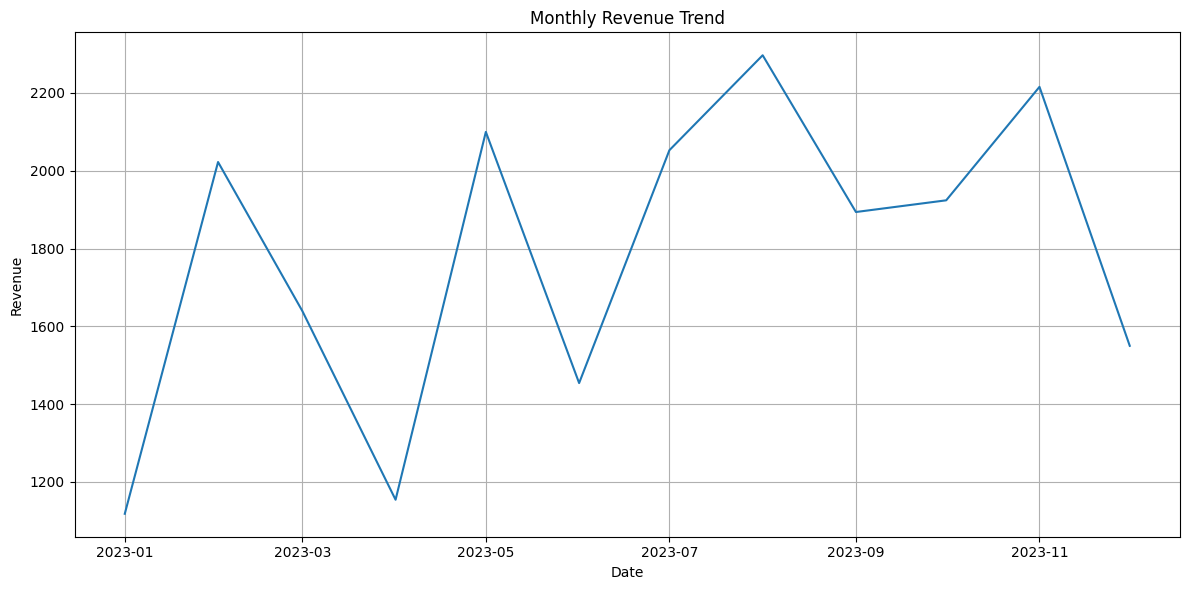

C:\Users\user\AppData\Local\Temp\ipykernel_3492\2435355173.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="total", palette="pastel")


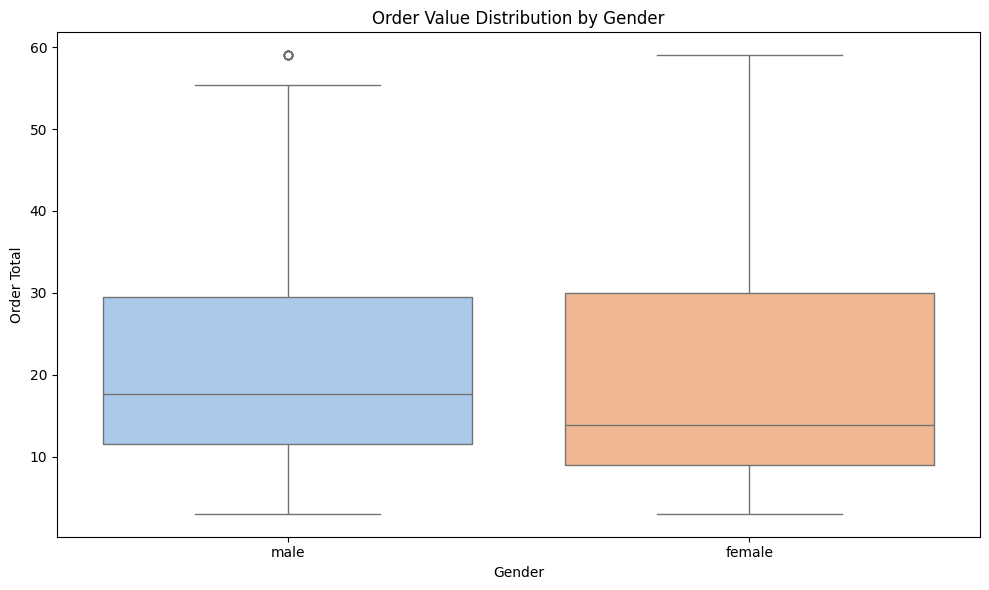

C:\Users\user\AppData\Local\Temp\ipykernel_3492\2435355173.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="quantity", y="product_id", palette="mako")


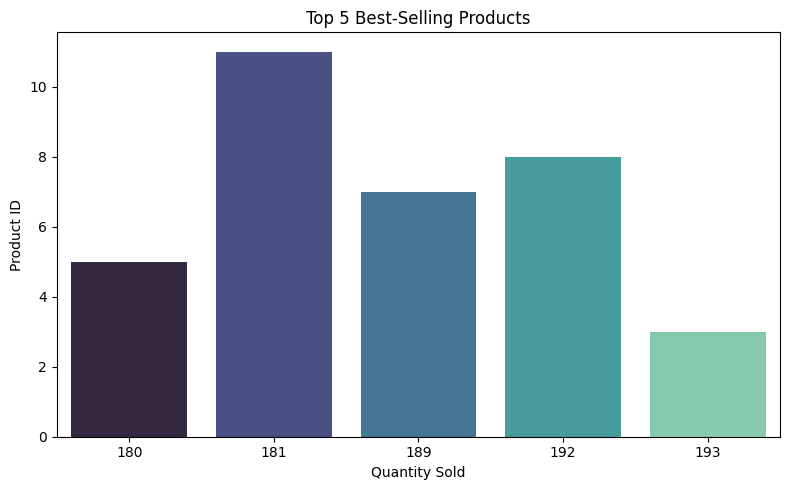

C:\Users\user\AppData\Local\Temp\ipykernel_3492\2435355173.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="crest")


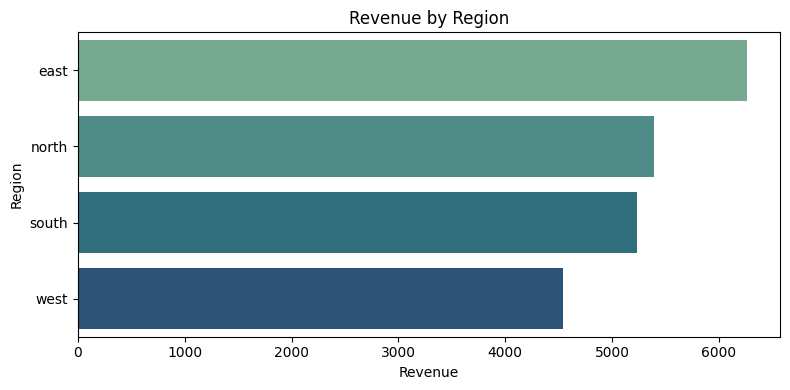

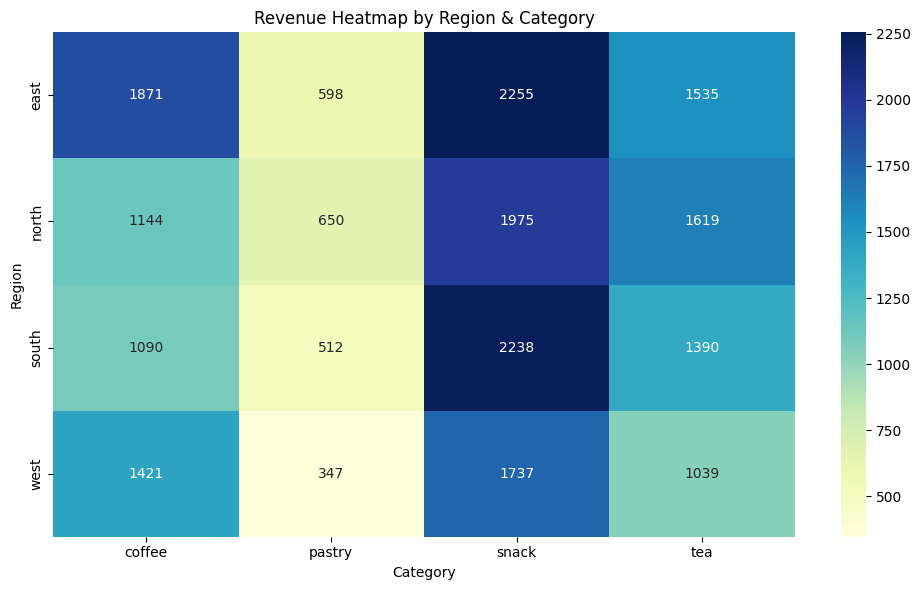

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\user\Downloads\project\coffee_chain_cleaned.csv")

# Preview the first 5 rows
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

# group revenue by category
category_revenue = df.groupby("category")["total"].sum().sort_values(ascending=False)
# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")
plt.title("Revenue by Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Monthly Revenue Trend (Line Chart)
monthly_revenue = df.groupby(["year", "month"])["total"].sum().reset_index()
monthly_revenue["date"] = pd.to_datetime(monthly_revenue[["year", "month"]].assign(day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x="date", y="total", markers="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# Avg Order Value by Gender (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="gender", y="total", palette="pastel")
plt.title("Order Value Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Order Total")
plt.tight_layout()
plt.show()

# Top 5 Best-Selling Products (Bar Chart)
top_products = (
    df.groupby("product_id")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x="quantity", y="product_id", palette="mako")
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()

# Revenue by Region (Bar Chart)
region_revenue = df.groupby("region")["total"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="crest")
plt.title("Revenue by Region")
plt.xlabel("Revenue")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Revenue Heatmap by Region & Category
heatmap_data = (
    df.groupby(["region", "category"])["total"]
    .sum()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Revenue Heatmap by Region & Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()
